In [1]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Concatenate, Add
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, Conv2D, MaxPooling2D, Dropout, BatchNormalization, ReLU
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.utils import plot_model
import tensorflow as tf
tf.config.LogicalDeviceConfiguration(memory_limit=(1024/2)**2)
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

2022-10-25 22:20:15.325920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 22:20:15.734341: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-25 22:20:16.903898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-25 22:20:16.903985: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()
Y_train = pd.get_dummies(Y_train).values
Y_test = pd.get_dummies(Y_test).values

X_train=X_train.astype(float)/255
X_test=X_test.astype(float)/255
X_train = X_train.reshape(-1,28,28,1)
X_test =  X_test.reshape(-1,28,28,1)

In [3]:
input = Input(shape=(28,28,1))
y = Conv2D(filters=6, kernel_size=(3,3), activation='sigmoid',padding='same')(input)
y = Conv2D(filters=6, kernel_size=(3,3), activation='sigmoid',padding='same')(y)

x = Add()([y, 
Conv2D(filters=6, kernel_size=(2,2), activation='sigmoid',padding='same')(input)])
x = ReLU()(x)
x = (MaxPooling2D(pool_size=(2,2), strides=2))(x)
x = (Conv2D(filters=10, kernel_size=(3,3), activation='sigmoid',padding='valid'))(x)
x = (MaxPooling2D(pool_size=(2,2), strides=2, ))(x)
x = (Conv2D(filters=16, kernel_size=(2,2), activation='sigmoid',padding='valid'))(x)
x = (Flatten())(x)
x = (Dense(120, activation='sigmoid'))(x)
x = (Dense(84, activation='sigmoid'))(x)
x = (Dense(10, activation='softmax'))(x)
model = Model(input, x, name='lenet')
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

2022-10-25 22:20:24.320753: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 22:20:24.357916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 22:20:24.358247: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 22:20:24.359121: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

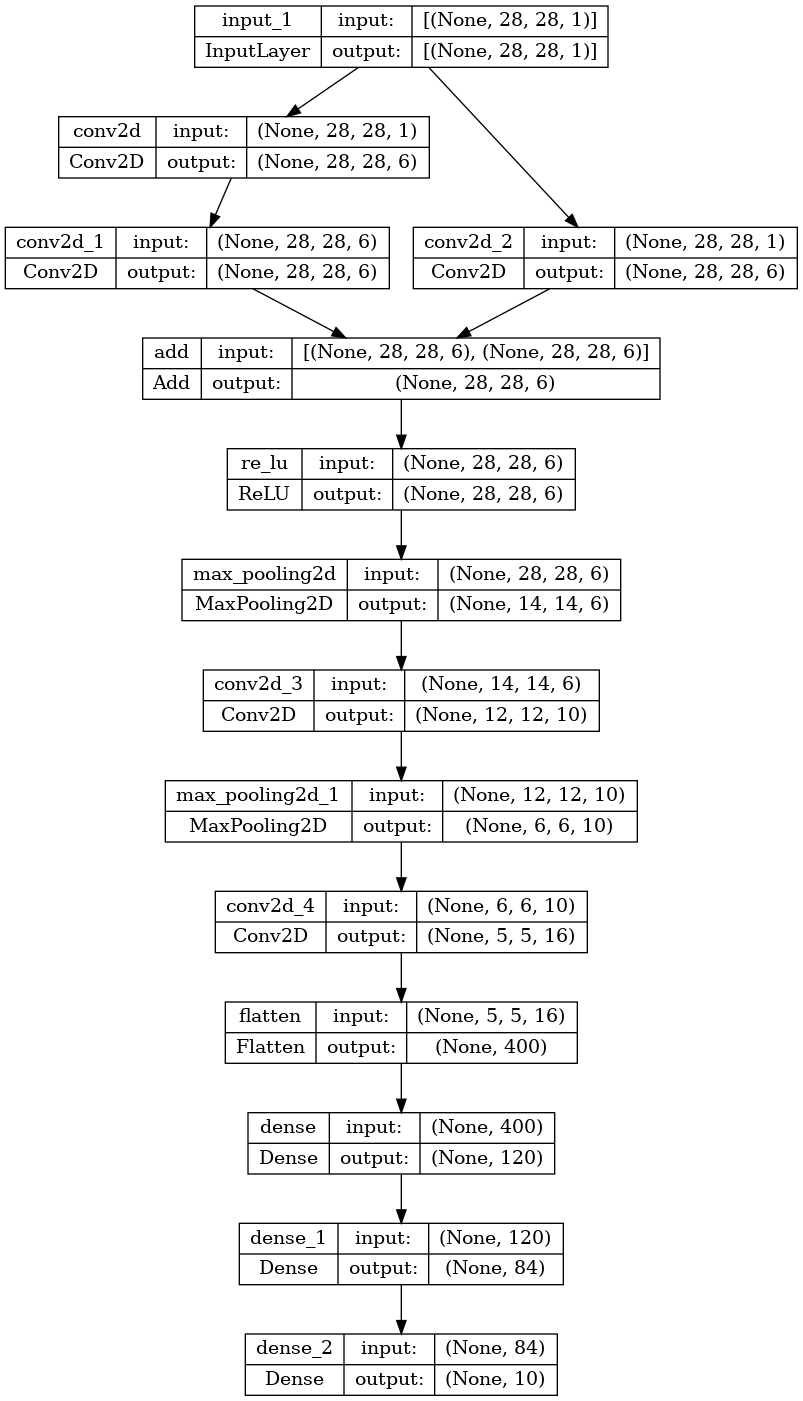

In [4]:
plot_model(model, 'weight_modified2.png', show_shapes=True)

In [66]:
188160000/(1024**2)

179.443359375

In [6]:
mf = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/100
1875/1875 - 26s - loss: 0.3482 - accuracy: 0.8713 - val_loss: 0.3699 - val_accuracy: 0.8650 - 26s/epoch - 14ms/step
Epoch 2/100
1875/1875 - 26s - loss: 0.3333 - accuracy: 0.8766 - val_loss: 0.3604 - val_accuracy: 0.8700 - 26s/epoch - 14ms/step
Epoch 3/100
1875/1875 - 28s - loss: 0.3218 - accuracy: 0.8794 - val_loss: 0.3590 - val_accuracy: 0.8682 - 28s/epoch - 15ms/step
Epoch 4/100
1875/1875 - 27s - loss: 0.3090 - accuracy: 0.8842 - val_loss: 0.3413 - val_accuracy: 0.8734 - 27s/epoch - 15ms/step
Epoch 5/100
1875/1875 - 28s - loss: 0.2987 - accuracy: 0.8877 - val_loss: 0.3344 - val_accuracy: 0.8762 - 28s/epoch - 15ms/step
Epoch 6/100
1875/1875 - 29s - loss: 0.2887 - accuracy: 0.8910 - val_loss: 0.3393 - val_accuracy: 0.8728 - 29s/epoch - 16ms/step
Epoch 7/100
1875/1875 - 29s - loss: 0.2821 - accuracy: 0.8946 - val_loss: 0.3198 - val_accuracy: 0.8821 - 29s/epoch - 15ms/step
Epoch 8/100
1875/1875 - 29s - loss: 0.2741 - accuracy: 0.8965 - val_loss: 0.3018 - val_accuracy: 0.8874 

In [7]:
weight = model.get_weights()
np.savetxt('weight_functional_api.csv' , weight , fmt='%s', delimiter=',')

/home/pancrackhead/anaconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:1378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


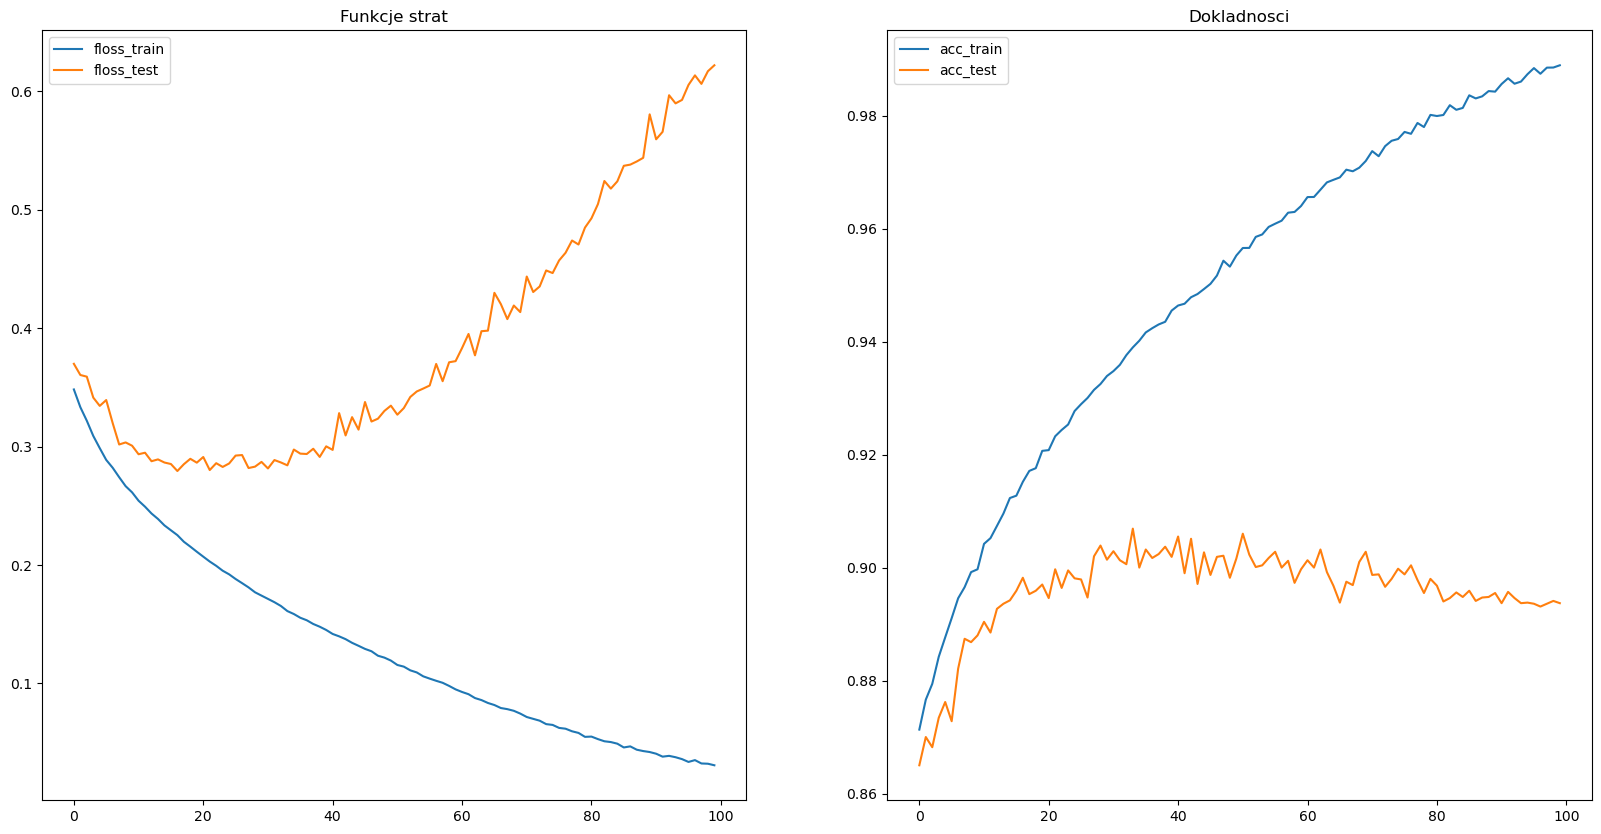

In [8]:
historia = model.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))
epochs = np.arange(0, 100)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()

plt.savefig('accuracy_functional_api.png')
plt.show()

In [14]:
np.max(acc_test)

0.9068999886512756